#### Homework 8 - Analiza Eksploracyjna Danych
Jan Krężel

Zestaw danych: [World Happiness](https://www.kaggle.com/unsdsn/world-happiness)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [238]:
df = pd.read_csv("data/2015.csv")

1. Jaki region świata jest najczęśliwszy?

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

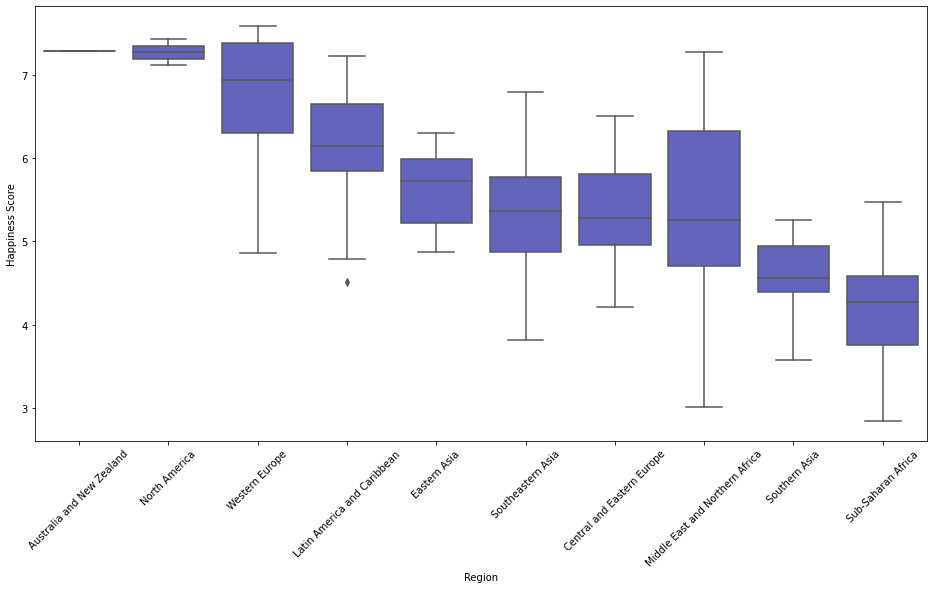

In [261]:
fig, ax = plt.subplots(figsize = (16, 8))
plt.xticks(rotation=45)
sns.boxplot(x = df["Region"], y = df["Happiness Score"], \
    order = df.groupby("Region")["Happiness Score"].agg(np.median).sort_values(ascending = False).index,\
    color = "#5555cc")

Najszczęśliwsze są państwa zachodu czyli te leżące w Ameryce Północnej, Europie Zachodniej oraz Australia i Nowa Zelandia.

Mimo, że Europa Zachodnia względem mediany jest na trzecim miejscu to pierwsze cztery pozycje w rankingu zajmują państwa z właśnie tego regionu.

2. Jaki wpływ mają poszczególne współczynniki na wynik?

<AxesSubplot:>

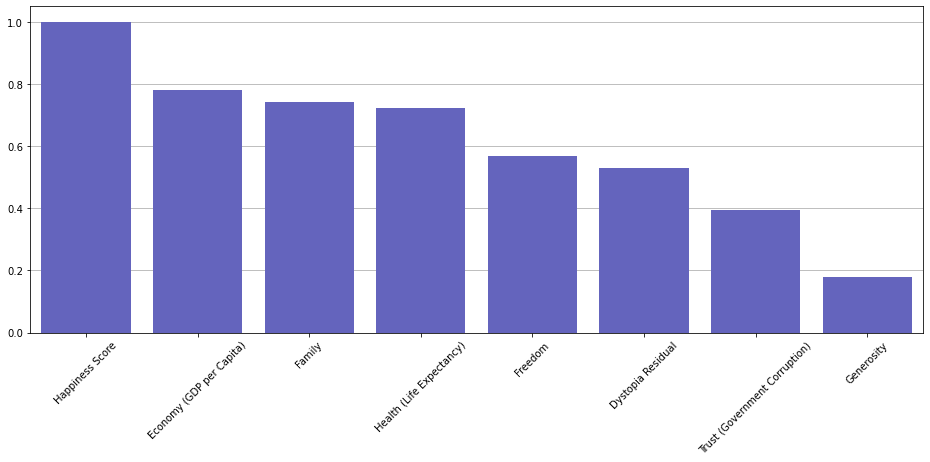

In [131]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.xticks(rotation=45)
ax.set_axisbelow(True)
plt.grid(axis="y")
hs_corr = df.drop(["Standard Error", "Happiness Rank"], axis=1).corr()["Happiness Score"].sort_values(ascending = False)
sns.barplot(x = hs_corr.index, y = hs_corr.values, color = "#5555cc")


Najlepiej skorelowane z "Happiness Score" są wskaźniki dotyczące PKB (GDP), Rodziny oraz Zdrowia

<AxesSubplot:title={'center':'Happiness Score vs Freedom'}, xlabel='Happiness Score', ylabel='Freedom'>

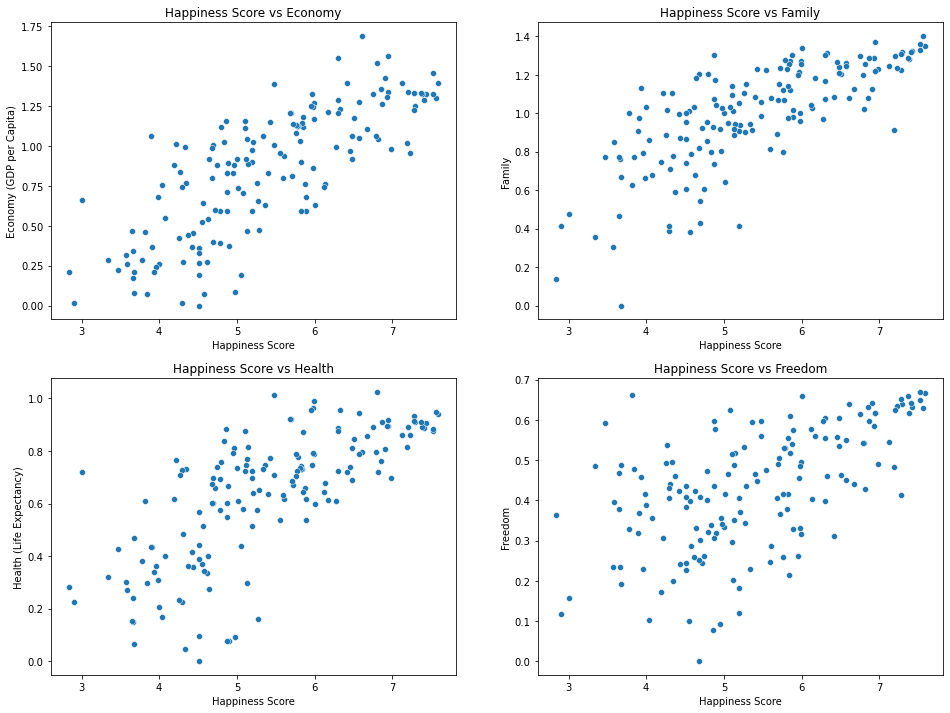

In [94]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))
axes[0][0].set_title("Happiness Score vs Economy")
axes[0][1].set_title("Happiness Score vs Family")
axes[1][0].set_title("Happiness Score vs Health")
axes[1][1].set_title("Happiness Score vs Freedom")
sns.scatterplot(ax=axes[0][0], x = df["Happiness Score"], y = df["Economy (GDP per Capita)"])
sns.scatterplot(ax=axes[0][1], x = df["Happiness Score"], y = df["Family"])
sns.scatterplot(ax=axes[1][0], x = df["Happiness Score"], y = df["Health (Life Expectancy)"])
sns.scatterplot(ax=axes[1][1], x = df["Happiness Score"], y = df["Freedom"])

Co ciekawe dla wskaźnika Rodziny wydaje się, że od mniej więcej połowy rankingu ma on dużo większe znaczenie. Możemy to dokładniej sprawdzić.

<AxesSubplot:>

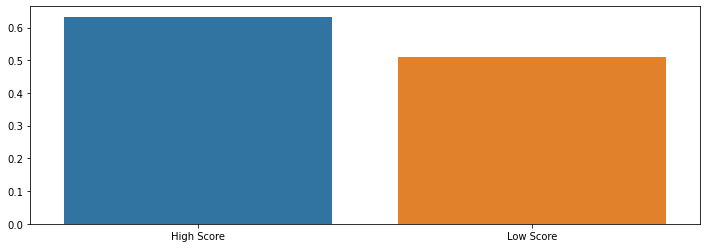

In [107]:
low_score = df[df["Happiness Score"] <= 5][["Happiness Score", "Family"]]
high_score = df[df["Happiness Score"] > 5][["Happiness Score", "Family"]]
fig, ax = plt.subplots(figsize = (12, 4))
sns.barplot(x = ["High Score", "Low Score"], y = [high_score.corr().iloc[0, 1], low_score.corr().iloc[0, 1]])

Rzeczywiście dla państw o już wysokim wyniku wskaźnik Rodziny jest lepiej skorelowany z wynikiem. Być może jest to spowodowane tym, że ludzie w państwach już szczęśliwych nie muszą martwić się innymi czynnikami jak ekonomia i mogą bardziej skupić się na swojej rodzinie.

3. Sprawdźmy czy występują jakieś niespodziewane korelacje między wskaźnikami

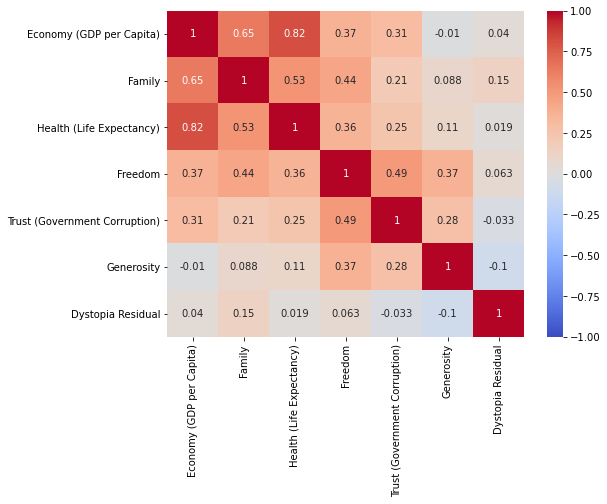

In [128]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.drop(["Happiness Score", "Happiness Rank", "Standard Error"], axis = 1).corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

Raczej nie widać żadnych zaskakujących wyników. Jedynym ciekawszym spostrzerzeniem możeby być średnia korelacja Zaufania z Wolnością. Prawdopodobnie wartość obu tych czynników wynika z postaci rządu w danym państwie. Państwa demokratyczne, w których z reguły nie ma opresji mogą cieszyć się lepszym zaufaniem od swoich obywateli.

4. Zmiana wskaźników na przestrzeni lat

In [243]:
# Trzeba trochę ustandaryzować dane ponieważ kolumny przyjmują różne standardy nazewnictwa

col_dict = {"Happiness Rank": "Rank", "Happiness Score": "Score", "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health", "Trust (Government Corruption)": "Trust"}

df15 = df.drop(["Standard Error", "Region"], axis = 1).rename(columns = col_dict)
df15["Year"] = 2015

df16 = pd.read_csv("data/2016.csv").drop(["Lower Confidence Interval", "Upper Confidence Interval", "Region"], axis = 1).\
    rename(columns = col_dict)
df16["Year"] = 2016

df17 = pd.read_csv("data/2017.csv").drop(["Whisker.high", "Whisker.low"], axis = 1)
df17.columns = df16.columns[:-1]
df17["Year"] = 2017

df18 = pd.read_csv("data/2018.csv")
tmp = ["Country or region", "Overall rank"]
tmp.extend(df18.columns[2:])
df18 = df18[tmp]
df18.columns = df16.columns[:-2]
df18.rename(columns = {"Family": "Social Support"}, inplace=True)
df18["Year"] = 2018

df19 = pd.read_csv("data/2019.csv")
tmp = ["Country or region", "Overall rank"]
tmp.extend(df19.columns[2:])
df19 = df19[tmp]
df19.columns = df18.columns[:-1]
df19.rename(columns = {"Family": "Social Support"}, inplace=True)
df19["Year"] = 2019

dfs = [df15, df16, df17, df18, df19]

Wpierw jak zmienia się średni poziom szcześcia

(5.0, 6.0)

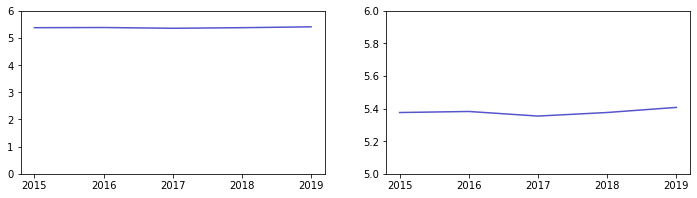

In [207]:
fig, axes = plt.subplots(1, 2, figsize = (12, 3))
sns.lineplot(ax = axes[0], x = [f"{i}" for i in range(2015, 2020)], y = [df["Score"].mean() for df in dfs], color = "#5555cc")
axes[0].set_ylim([0, 6])
sns.lineplot(ax = axes[1], x = [f"{i}" for i in range(2015, 2020)], y = [df["Score"].mean() for df in dfs], color = "#5555cc")
axes[1].set_ylim([5, 6])

Jak widać zmiana na przestrzeni lat jest nieznaczna

5. Sprawdźmy na koniec jak zmieniało się znaczenie wskaźników w poszczególnych latach

In [258]:
corr15 = df15.drop(["Year", "Dystopia Residual", "Family", "Rank"], axis = 1).corr()
corr19 = df19.drop(["Year", "Social Support", "Rank"], axis = 1).corr()

<AxesSubplot:>

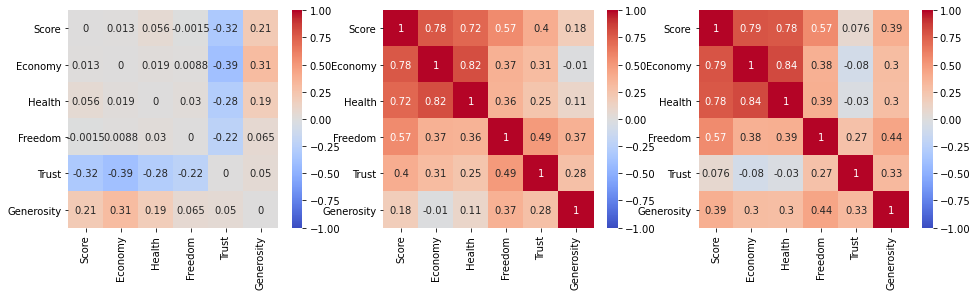

In [260]:
fig, axes = plt.subplots(1, 3, figsize = (16, 4))
sns.heatmap(ax = axes[0], data = corr19 - corr15, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
sns.heatmap(ax = axes[1], data = corr15, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
sns.heatmap(ax = axes[2], data = corr19, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

Jeśli chodzi w korelację z wynikiem to na przestrzeni lat dużo mniejsze znaczenie ma Zaufanie, a ważniejsza ma Hojność.

Jednak dla tych dwóch wskaźników możemy zauważyć globalną zmianę w korelacji. Korelacja z prawie wszystkimi innymi wskaźnikami odpowiednio zmalała lub wzrosła. Jedynie między samą tą parąpozostała ona niemal bez zmian.

Należy zaznaczyć, że określenie "Korelacja zmalała" odnosi się tutaj do bezwzględnej wartości korelacji. 
Przykładowo zmianę korelacji z -0.6 do -1 trudno nazwać zmniejszeniem, gdy po zmianie dwie zmienne są całkowicie skorelowane odwrotnie.